# Supervised Machine Learning Models - Linear Regression - Exercise Solution

#### Exercise

In this exercise you will use the **Financial_Data.csv** files to predict future sales growth using linear regression. There are 5 files, one for each year from 2014 to 2018:   

        2014_Financial_Data.csv
        2015_Financial_Data.csv
        2016_Financial_Data.csv
        2017_Financial_Data.csv
        2018_Financial_Data.csv

The data was obtained from https://www.kaggle.com/datasets/cnic92/200-financial-indicators-of-us-stocks-20142018 and contains many financial variables for firms from 2014 to 2018. Among these variables are the following:

| Variable | Definition |
| --- | --- |
| Unnamed column | stock market ticker |
| Revenue | revenue  |
| Revenue Growth | revenue growth from year t-1 to t |
| SG&A Expense | sg&a expenses  |
| Total assets | total assets  |
| Net Income | net income |
| grossProfitMargin | (revenue - cogs) / revenue  |
| returnOnAssets | net income  / total assets  |
| debtEquityRatio | total liabilities  / total shareholder equity  |
| Free Cash Flow margin | free cash flow  / revenue  |
| priceToBookRatio | market price per share / book value per share  |
| fixedAssetTurnover | revenue  / average fixed assets |
| assetTurnover | revenue  / average total assets |
| currentRatio | current assets  / current liabilities  |
| daysOfSalesOutstanding | (average accounts receivable  / revenue ) * 365 |
| daysOfInventoryOutstanding | (average inventory  / cost of goods sold ) * 365 |
| daysOfPayablesOutstanding | (average accounts payable  / cost of goods sold ) * 365 |
| interestCoverage | earnings before interest and taxes (EBIT)  / interest expense  |
| effectiveTaxRate | income tax expense / pretax income  |
| capitalExpenditureCoverageRatios | cash flow from operations / capital expenditures |
| dividendPayoutRatio | dividends per share / earnings per share |

Use ordinary least squares to predict revenue growth for year t+1 (**Fut Revenue Growth**) using the following independent variables:

        Revenue Growth
        sga_expenses
        roa
        ln_assets
        grossProfitMargin
        debtEquityRatio
        Free Cash Flow margin
        priceToBookRatio
        fixedAssetTurnover
        assetTurnover
        currentRatio
        daysOfSalesOutstanding
        daysOfInventoryOutstanding
        daysOfPayablesOutstanding
        interestCoverage
        capitalExpenditureCoverageRatios
        dividendPayoutRatio

You will need to calculate **Fut Revenue Growth** (**Revenue Growth** in year t+1), **sga_expenses** (**SG&A Expense**/**Revenue**), **roa** (**Net Income**/**Total assets**), and **ln_assets** (natural logarithm of **Total assets**). All other variables are included as columns in the datasets. Replace null values in the **sga_expenses** and **dividendPayoutRatio** columns with 0. Remove rows with missing data for any of these variables. Winsorize all variables at the 1st and 99th percentiles.

Train the linear regression model on a random sample of 75% of the observations in the dataset, and test the model on the remaining 25% of the observations in the dataset. How well did the model perform?

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 10000)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.3f}'.format

In [2]:
# List of filenames
filenames = ['2014_Financial_Data.csv', '2015_Financial_Data.csv', '2016_Financial_Data.csv', '2017_Financial_Data.csv', '2018_Financial_Data.csv']

# Read CSV files and store them in a list
dfs = []
for filename in filenames:
    year = int(filename.split('_')[0])
    df = pd.read_csv(filename)
    df['year'] = year
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dfs)

# Reset the index of the concatenated DataFrame
df.reset_index(drop=True, inplace=True)

# Print the concatenated DataFrame
df.head()


,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per S

In [3]:
# Rename the ticker column

df = df.rename(columns={'Unnamed: 0':'ticker'})
df.head()

,ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share

In [4]:
# Calculate Future Revenue Growth

df = df.sort_values(['ticker', 'year'])
df['futyear'] = df['year'].shift(-1)
df['futticker'] = df['ticker'].shift(-1)
df['Fut Revenue Growth'] = np.where((df.futyear-1 == df.year) & (df.futticker == df.ticker), df['Revenue Growth'].shift(-1), np.nan)

df = df[(df['Revenue'] != 0) & (pd.isnull(df['Revenue']) == False)]
df = df[(pd.isnull(df['Revenue Growth']) == False)]
df = df[(pd.isnull(df['Fut Revenue Growth']) == False)]

df[['ticker','futticker','year','futyear','Revenue Growth','Fut Revenue Growth']].head(8)

,ticker,futticker,year,futyear,Revenue Growth,Fut Revenue Growth
460,A,A,2014,"2,015.000",0.040,-0.003
4300,A,A,2015,"2,016.000",-0.003,0.041
8452,A,A,2016,"2,017.000",0.041,0.064
13261,A,A,2017,"2,018.000",0.064,0.099
180,AA,AA,2014,"2,015.000",0.046,-0.148
3998,AA,AA,2015,"2,016.000",-0.148,-0.168
8135,AA,AA,2016,"2,017.000",-0.168,0.251
12939,AA,AA,2017,"2,018.000",0.251,0.150


In [5]:
# Calculate other variables

df['sga_expenses'] = df['SG&A Expense'] / df['Revenue']
df['roa'] = df['Net Income']/df['Total assets']
df['ln_assets'] = np.log(df['Total assets'])

# Fill na with 0
df['sga_expenses'] = df['sga_expenses'].fillna(0)
df['dividendPayoutRatio'] = df['dividendPayoutRatio'].fillna(0)

In [6]:
# Keep only variables we will be using

df = df[['ticker','year','Fut Revenue Growth',
    'Revenue Growth', 
    'sga_expenses',
    'roa',
    'ln_assets',
    'grossProfitMargin',
    'debtEquityRatio',
    'Free Cash Flow margin',
    'priceToBookRatio',
    'fixedAssetTurnover',
    'assetTurnover',
    'currentRatio',
    'daysOfSalesOutstanding',
    'daysOfInventoryOutstanding',
    'daysOfPayablesOutstanding',
    'interestCoverage',
    'capitalExpenditureCoverageRatios',
    'dividendPayoutRatio',]]

# Drop missing data

df = df.dropna()

# Check for outliers

display(df.describe())
df.head()

,year,Fut Revenue Growth,Revenue Growth,sga_expenses,roa,ln_assets,grossProfitMargin,debtEquityRatio,Free Cash Flow margin,priceToBookRatio,fixedAssetTurnover,assetTurnover,currentRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,interestCoverage,capitalExpenditureCoverageRatios,dividendPayoutRatio
count,"11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000"
mean,"2,015.630",0.591,4.652,3.123,-0.063,20.720,0.467,0.675,-5.427,9.303,24.137,0.822,2.890,-125.356,72.491,209.033,-33.292,-21.882,0.464
std,1.085,13.212,400.470,67.805,0.527,2.161,2.361,23.621,104.136,103.598,602.334,0.864,5.662,"3,235.950",394.427,"2,689.454","3,030.904",625.821,7.462
min,"2,014.000",-1.000,-0.999,0.000,-28.047,13.110,-223.483,-776.587,"-8,011.394",0.000,0.001,0.000,0.000,"-276,305.000",0.000,0.000,"-223,603.000","-46,880.000",0.000
25%,"2,015.000",-0.015,-0.015,0.121,-0.027,19.272,0.271,0.012,-0.037,0.447,1.833,0.254,1.063,-81.108,20.480,13.250,0.000,0.553,0.000
50%,"2,016.000",0.064,0.059,0.245,0.022,20.825,0.447,0.439,0.047,1.964,5.054,0.631,1.810,-20.458,48.260,26.354,1.484,2.198,0.000
75%,"2,017.000",0.180,0.182,0.476,0.063,22.207,0.735,1.059,0.130,4.816,11.511,1.147,3.055,0.000,71.140,48.358,7.936,5.477,0.351
max,"2,017.000",825.960,"42,138.664","5,840.940",3.606,26.924,34.811,"2,131.513",235.927,"7,253.537","59,615.000",19.596,307.021,67.040,"27,392.359","169,097.565","130,476.556","7,004.000",746.701


,ticker,year,Fut Revenue Growth,Revenue Growth,sga_expenses,roa,ln_assets,grossProfitMargin,debtEquityRatio,Free Cash Flow margin,priceToBookRatio,fixedAssetTurnover,assetTurnover,currentRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,interestCoverage,capitalExpenditureCoverageRatios,dividendPayoutRatio
460,A,2014,-0.003,0.040,0.296,0.051,23.104,0.488,0.314,0.133,6.139,6.415,0.374,3.256,-101.115,56.445,27.231,5.964,3.827,0.321
4300,A,2015,0.041,-0.003,0.294,0.054,22.735,0.505,0.397,0.105,9.391,6.685,0.540,3.777,-98.881,54.777,25.219,7.712,5.953,0.332
8452,A,2016,0.064,0.041,0.298,0.059,22.777,0.523,0.449,0.156,10.843,6.576,0.539,3.847,-97.030,54.811,22.324,8.556,5.705,0.325
13261,A,2017,0.099,0.064,0.275,0.081,22.855,0.539,0.416,0.159,11.758,5.908,0.531,3.301,-101.733,59.092,24.894,11.165,5.051,0.249
180,AA,2014,-0.148,0.046,0.029,-0.014,23.651,0.198,0.032,0.030,0.459,1.161,0.704,1.067,-51.940,19.767,48.308,1.091,1.896,0.000


In [7]:
# Winsorize at the 1st and 99th Percentiles -- USE CHAT GPT

from scipy.stats import mstats

num_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

for col in num_vars:
    if col not in ['year']:
        df[col] = mstats.winsorize(df[col], limits=[0.01, 0.01])

df.describe()

,year,Fut Revenue Growth,Revenue Growth,sga_expenses,roa,ln_assets,grossProfitMargin,debtEquityRatio,Free Cash Flow margin,priceToBookRatio,fixedAssetTurnover,assetTurnover,currentRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,interestCoverage,capitalExpenditureCoverageRatios,dividendPayoutRatio
count,"11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000","11,101.000"
mean,"2,015.630",0.167,0.184,1.006,-0.046,20.721,0.509,0.677,-1.466,5.737,12.821,0.804,2.685,-56.577,57.890,86.097,4.480,-4.807,0.296
std,1.085,0.595,0.651,4.329,0.261,2.133,0.301,2.841,8.952,13.549,26.490,0.722,3.039,89.259,65.860,313.464,157.978,57.501,0.675
min,"2,014.000",-0.814,-0.636,0.000,-1.533,15.841,-0.132,-14.826,-77.949,0.000,0.068,0.006,0.027,-538.215,0.000,0.000,-984.753,-442.159,0.000
25%,"2,015.000",-0.015,-0.015,0.121,-0.027,19.272,0.271,0.012,-0.037,0.447,1.833,0.254,1.063,-81.108,20.480,13.250,0.000,0.553,0.000
50%,"2,016.000",0.064,0.059,0.245,0.022,20.825,0.447,0.439,0.047,1.964,5.054,0.631,1.810,-20.458,48.260,26.354,1.484,2.198,0.000
75%,"2,017.000",0.180,0.182,0.476,0.063,22.207,0.735,1.059,0.130,4.816,11.511,1.147,3.055,0.000,71.140,48.358,7.936,5.477,0.351
max,"2,017.000",4.451,4.916,37.895,0.271,25.539,1.000,14.837,0.592,100.036,194.785,3.534,18.904,0.000,473.520,"2,679.698",889.246,107.500,4.708


In [8]:
# Create training and test sets

X = df[['Revenue Growth', 
    'sga_expenses',
    'roa',
    'ln_assets',
    'grossProfitMargin',
    'debtEquityRatio',
    'Free Cash Flow margin',
    'priceToBookRatio',
    'fixedAssetTurnover',
    'assetTurnover',
    'currentRatio',
    'daysOfSalesOutstanding',
    'daysOfInventoryOutstanding',
    'daysOfPayablesOutstanding',
    'interestCoverage',
    'capitalExpenditureCoverageRatios',
    'dividendPayoutRatio',]].assign(_const=1)
y = df[['Fut Revenue Growth']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

print()
print(f'# Observations in X_train: {len(X_train)}')
print(f'# Observations in y_train: {len(y_train)}')
print(f'# Observations in X_test: {len(X_test)}')
print(f'# Observations in y_test: {len(y_test)}')

display(X_train.head())
display(y_train.head())


# Observations in X_train: 8325
# Observations in y_train: 8325
# Observations in X_test: 2776
# Observations in y_test: 2776


,Revenue Growth,sga_expenses,roa,ln_assets,grossProfitMargin,debtEquityRatio,Free Cash Flow margin,priceToBookRatio,fixedAssetTurnover,assetTurnover,currentRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,interestCoverage,capitalExpenditureCoverageRatios,dividendPayoutRatio,_const
1170,0.066,0.276,0.071,20.464,0.342,0.015,0.042,2.525,10.643,1.760,3.123,-60.097,41.040,15.107,158.735,2.693,0.191,1
3554,-0.232,0.087,0.032,21.120,0.141,0.000,0.065,7.619,68.911,1.193,1.874,0.000,77.601,30.761,14.585,11.054,0.662,1
7853,0.111,0.116,0.110,17.828,0.192,0.000,0.025,2.272,91.346,1.929,2.888,0.000,65.087,0.644,0.000,10.599,-0.000,1
9536,0.136,0.201,-0.166,17.861,0.627,-0.564,-0.024,0.000,6.441,0.964,0.531,-16.854,0.000,7.703,-4.961,0.364,0.000,1
1943,0.372,0.241,-0.052,18.815,0.390,2.054,-1.020,5.011,0.429,0.243,2.360,0.000,44.035,44.156,-0.553,-0.091,0.000,1


,Fut Revenue Growth
1170,0.050
3554,-0.126
7853,-0.086
9536,-0.011
1943,1.265


In [9]:
# Run the linear regression and create the prediction variable

model = LinearRegression().fit(X_train, y_train.values.ravel())

y_test['Fut Revenue Growth_p'] = model.predict(X_test)
y_test.head()

,Fut Revenue Growth,Fut Revenue Growth_p
4482,0.584,0.742
13458,-0.814,0.270
17032,0.182,0.089
11973,0.056,0.186
1408,-0.100,0.090


In [10]:
# View the model output

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Fut Revenue Growth   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     121.9
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:49:13   Log-Likelihood:                -6600.2
No. Observations:                8325   AIC:                         1.324e+04
Df Residuals:                    8307   BIC:                         1.336e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Revenue 

In [11]:
# Evaluate the model

model = sm.OLS(y_test['Fut Revenue Growth'], y_test[['Fut Revenue Growth_p']].assign(_const=1)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Fut Revenue Growth   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     656.0
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          4.66e-130
Time:                        13:49:17   Log-Likelihood:                -2166.6
No. Observations:                2776   AIC:                             4337.
Df Residuals:                    2774   BIC:                             4349.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Fut Revenue Growth_p     0.9255 

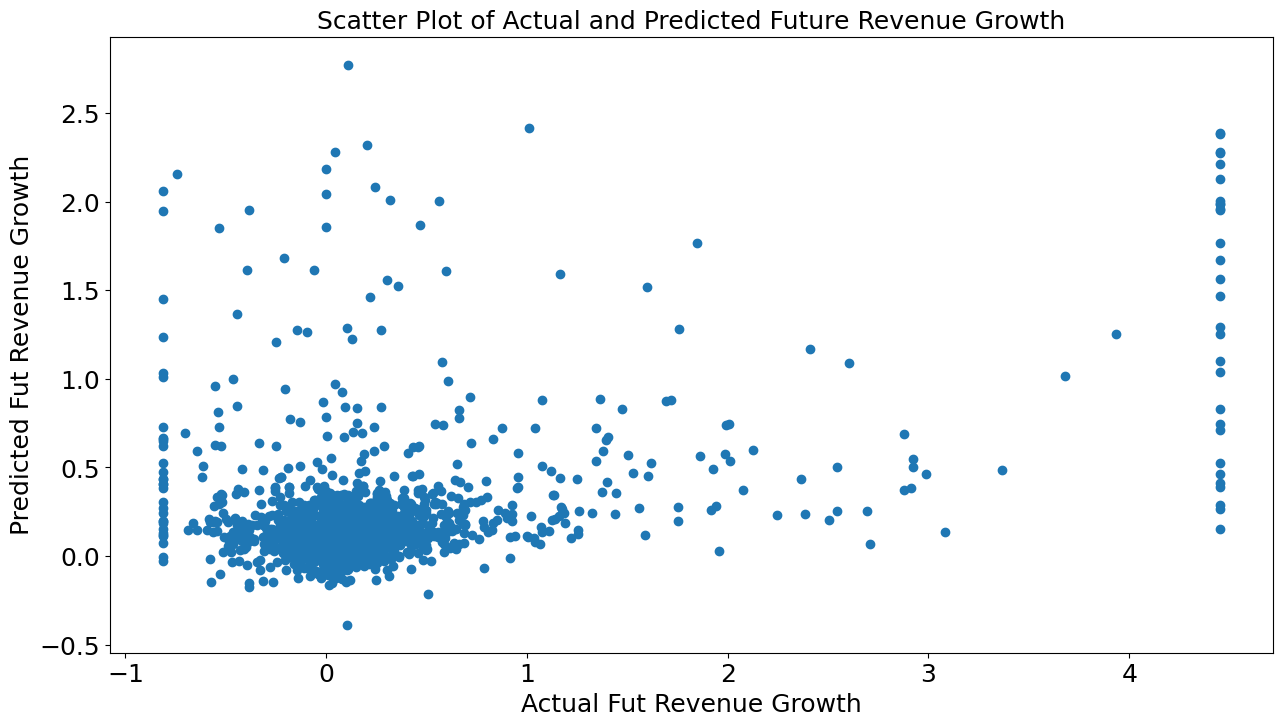

In [12]:
# Visualize the prediction

plt.figure(figsize=(15,8))
plt.scatter(y_test['Fut Revenue Growth'],y_test['Fut Revenue Growth_p'])
plt.xlabel('Actual Fut Revenue Growth',size=18)
plt.ylabel('Predicted Fut Revenue Growth',size=18)
plt.title('Scatter Plot of Actual and Predicted Future Revenue Growth',size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.show()